In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.utils import shuffle
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 

In [36]:
# second model using xgboost
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV


# reading the data

In [2]:
data_train = pd.read_csv('/content/drive/MyDrive/financial/Train.csv')
data_test = pd.read_csv('/content/drive/MyDrive/financial/Test.csv')



In [3]:
train_data = data_train
data_train.head(4)

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private


In [4]:
data_train.shape
data_test.shape

(10086, 12)

In [5]:
data_train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [6]:
data_train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


# checking for null value

In [7]:
print('missing values:', data_train.isnull().sum())

missing values: country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64


In [8]:
#shufling the data set
data_train = shuffle(data_train,random_state = 22)

In [9]:
data_train.columns

Index(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

In [10]:
#viewing the number of people with bank accounts in the dtatset
data_train['bank_account'].value_counts()

No     20212
Yes     3312
Name: bank_account, dtype: int64

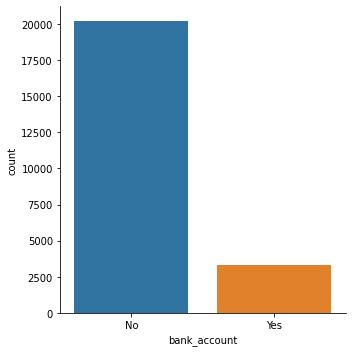

In [11]:
sns.catplot(x="bank_account", kind="count", data=data_train)

In [12]:
#convert the year to float and use it training
data_train['year_'] = data_train['year']
data_test['year_'] = data_test['year']

# Convert the following numerical labels from integer to float
float_array = data_train[['household_size', 'age_of_respondent', 'year_']].values.astype(float)
float_array = data_test[['household_size', 'age_of_respondent', 'year_']].values.astype(float)

In [13]:
#labeling the data 
#bank encode
data_train['bank_account'] = data_train['bank_account'].map({'No':0,'Yes':1})


#location encode
data_train['location_type'] = data_train['location_type'].map({'Rural':0,'Urban':1})


#cellphone_access encode
data_train['cellphone_access'] = data_train['cellphone_access'].map({'No':0,'Yes':1})


#gender_of_respondent encode
data_train['gender_of_respondent'] = data_train['gender_of_respondent'].map({'Male':0,'Female':1})


#hot encoding
categ=['relationship_with_head','marital_status','education_level','job_type','year_']

data_train=pd.get_dummies(data_train,prefix_sep='_',columns=categ)

data_train.head(5)


,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head_Child,...,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,year__2016,year__2017,year__2018
4545,Kenya,2018,uniqueid_4546,0,0,1,2,52,0,0,...,1,0,0,0,0,0,0,0,0,1
14232,Rwanda,2016,uniqueid_8165,0,0,0,7,56,0,0,...,0,0,0,0,0,0,0,1,0,0
17727,Tanzania,2017,uniqueid_2925,0,0,1,4,51,0,0,...,0,0,0,0,0,0,1,0,1,0
4578,Kenya,2018,uniqueid_4579,1,1,1,3,24,0,0,...,0,0,1,0,0,0,0,0,0,1
17375,Tanzania,2017,uniqueid_2573,0,1,1,2,32,1,0,...,0,0,0,1,0,0,0,0,1,0


In [14]:
data_test['location_type'] = data_test['location_type'].map({'Rural':0,'Urban':1})

data_test['cellphone_access'] = data_test['cellphone_access'].map({'No':0,'Yes':1})

data_test['gender_of_respondent'] = data_test['gender_of_respondent'].map({'Male':0,'Female':1})

In [15]:
#hot encoding for tesst
categ2=['relationship_with_head','marital_status','education_level','job_type','year_']

In [16]:
data_test=pd.get_dummies(data_test,prefix_sep='_',columns=categ2)

In [17]:
data_test.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head_Child,relationship_with_head_Head of Household,...,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,year__2016,year__2017,year__2018
0,Kenya,2018,uniqueid_6056,1,1,3,30,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,Kenya,2018,uniqueid_6060,1,1,7,51,0,0,1,...,1,0,0,0,0,0,0,0,0,1
2,Kenya,2018,uniqueid_6065,0,0,3,77,1,0,0,...,0,0,0,0,0,1,0,0,0,1
3,Kenya,2018,uniqueid_6072,0,0,6,39,1,0,1,...,0,0,0,0,0,1,0,0,0,1
4,Kenya,2018,uniqueid_6073,1,0,3,16,0,1,0,...,0,0,0,0,0,1,0,0,0,1


# Model building

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
CV = CountVectorizer(min_df=1, stop_words="english",lowercase="True")




In [19]:
X_train = data_train.drop(['bank_account','uniqueid','country','year'], axis=1)
Y_train = data_train['bank_account']

X_test = data_test.drop(['year', 'uniqueid', 'country'], axis=1)

X_train.head()


,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head_Child,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,relationship_with_head_Other relative,relationship_with_head_Parent,...,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,year__2016,year__2017,year__2018
4545,0,1,2,52,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
14232,0,0,7,56,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
17727,0,1,4,51,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4578,1,1,3,24,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
17375,1,1,2,32,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [20]:
#rescale X_train and X_test
# import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [21]:
# show scaled train set 
X_train_scaled[:1]

array([[0.        , 1.        , 0.05      , 0.42857143, 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ]])

In [22]:
# show the shape after scalling 

print("Train set: {}".format(X_train_scaled.shape))
print("Test set: {}".format(X_test_scaled.shape))

Train set: (23524, 35)
Test set: (10086, 35)


In [23]:
# Split train_data
from sklearn.model_selection import train_test_split

X_Train, X_val, y_Train, y_val = train_test_split(X_train_scaled, Y_train, stratify = Y_train,
                                                  test_size = 0.2, random_state=42)

In [24]:
#making the model
from sklearn.neighbors import KNeighborsClassifier

#three knn neighbors to use
knn = KNeighborsClassifier(n_neighbors=9)

#model score to find result
from sklearn.model_selection import cross_val_score

In [25]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=9)

In [26]:
# import evaluation metrics 
from sklearn.metrics import confusion_matrix, accuracy_score

#evaluate the model
y_pred = knn.predict(X_val)

# Get error rate
print("Error rate of knn Classfier: ", 1 - accuracy_score(y_val, y_pred))

# Get confusion matrix
confusion_matrix(y_pred, y_val)

Error rate of knn Classfier:  0.140701381509033


array([[4043,  662],
       [   0,    0]])

In [27]:
# Get the predicted result for the test Data
data_test.bank_account = knn.predict(X_test_scaled)

In [28]:
score = cross_val_score(knn,X_train,Y_train, scoring="r2", cv=10)
score.mean()


-0.04087291803353754

In [29]:

score1=cross_val_score(knn, X_train, Y_train, scoring="r2",cv=10)

In [30]:
knn.score(X_train,Y_train)

0.8889219520489713

In [31]:

test_data=data_test.drop(['country','year','uniqueid'], axis=1)
test_data.head(5)

,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head_Child,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,relationship_with_head_Other relative,relationship_with_head_Parent,...,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,year__2016,year__2017,year__2018
0,1,1,3,30,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,1,7,51,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,0,0,3,77,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
3,0,0,6,39,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,1,0,3,16,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [32]:
import pickle
pickle.dump(knn,open("spam.pkl","wb"))
pickle.dump(CV,open("vectorizer.pkl","wb"))

#vect = CV.transform(data_test).toarray()


In [33]:
test_data.head(5)


,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head_Child,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,relationship_with_head_Other relative,relationship_with_head_Parent,...,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,year__2016,year__2017,year__2018
0,1,1,3,30,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,1,7,51,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,0,0,3,77,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
3,0,0,6,39,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,1,0,3,16,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [34]:
result = knn.predict(test_data)
print(result)

[1 0 0 ... 1 0 0]


In [43]:
data_test.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head_Child,relationship_with_head_Head of Household,...,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,year__2016,year__2017,year__2018
0,Kenya,2018,uniqueid_6056,1,1,3,30,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,Kenya,2018,uniqueid_6060,1,1,7,51,0,0,1,...,1,0,0,0,0,0,0,0,0,1
2,Kenya,2018,uniqueid_6065,0,0,3,77,1,0,0,...,0,0,0,0,0,1,0,0,0,1
3,Kenya,2018,uniqueid_6072,0,0,6,39,1,0,1,...,0,0,0,0,0,1,0,0,0,1
4,Kenya,2018,uniqueid_6073,1,0,3,16,0,1,0,...,0,0,0,0,0,1,0,0,0,1


In [44]:
submission = pd.DataFrame({"uniqueid": data_test["uniqueid"] + " x " + data_test["country"],"bank_account": data_train.bank_account})

submission.sample(5)

,uniqueid,bank_account
1746,uniqueid_7815 x Kenya,0
15555,NaN,0
8467,uniqueid_8742 x Tanzania,0
1333,uniqueid_7402 x Kenya,0
15979,NaN,0


In [45]:
# Create submission csv file
submission.to_csv('financial.csv', index = False)



In [46]:
# checking for null values in the answer 
test = pd.read_csv('/content/financial.csv')
test.isnull().sum()

uniqueid        13438
bank_account        0
dtype: int64